# Algoritmo de Dijkstra
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para explicar los fundamentos de los <code>Sistemas de comunicaciones</code> en los cursos de telemática y redes de computadores.</p>

## Descripción
Este algoritmo, también llamado de caminos mínimos, es un método para resolver el problema del camino mas corto.

### Agenda
1. Grafos
1. Algoritmo
1. Código
1. Ejemplo

In [2]:
# Importar librerías
import networkx as nx
import matplotlib.pyplot as plt


## 1. Grafos
---
En matemáticas y ciencias de la computación, un grafo es un conjunto de objetos llamados vértices o nodos unidos por enlaces llamados aristas o arcos, que permiten representar relaciones binarias entre los elementos del conjunto.

Un grafo es un par ordenado de la forma $G = (V,E)$ de tal forma que G es el conjunto de los vertices y E es un conjunto de tuplas que relacionan los vertices, indicado por cada arista y tiene las siguientes propiedades.

### 1.1. Propiedades
* __Orden:__ número de vertices del grafo.
* __Grado de un vértice:__ número aristas conectadas.
* __Bucle:__ es un vértice que se relaciona con si mismo.

### 1.2. Tipos de Grafos
Los grafos pueden ser:
* __No dirigido:__ si para cada par de nodos conectados, puedes ir de un nodo al otro en ambas direcciones.
* __Dirigido:__ si para cada par de nodos conectados, solo puedes ir de un nodo a otro en una dirección específica.
* __Ponderado:__ es un grafo cuyos arcos tienen un "costo" asociado.

### 1.3. Estructuras de datos
Las dos representaciones principales de grafos son las siguientes:

<table><tr>
<td>

\begin{aligned}
G &= (V,E) \\
V &= \{1,2,3,4,5\} \\
E &= \{(1,2),(1,4),(2,3),(2,5),(3,4),(4,5)\} \\

\end{aligned}
</td>
<td>

![](../img/graph.svg)
</td>
</tr></table>


#### 1.3.1. Matriz de adyacencia (MA): 
Una [__MA__](https://es.wikipedia.org/wiki/Matriz_de_adyacencia) es una matriz de tamaño n×n donde las filas y las columnas hacen referencia a los vértices y las intersecciones se usan para guardar las métricas asociadas a cada par de vértices del grafo.

|MA|1|2|3|4|5|
|--|--|--|--|--|--|
|1|0|1|0|1|0|
|2|1|0|1|0|1|
|3|0|1|0|1|0|
|4|1|0|1|0|1|
|5|0|1|0|1|0|

#### 1.3.1. Matriz de incidencia (MI): 
Una [__MI__](https://es.wikipedia.org/wiki/Matriz_de_incidencia) es una matriz de tamaño m×n donde las columnas representan las aristas y las filas hacen referencia a los vértices y las intersecciones se usan para señalar las aristas conectadas a los vértices del grafo.

|MI|a|b|c|d|e|f|
|--|--|--|--|--|--|--|
|1|1|0|0|1|0|0|
|2|1|1|0|0|0|1|
|3|0|1|1|0|0|0|
|4|0|0|1|1|1|0|
|5|0|0|0|0|1|1|

#### 1.3.1. Lista de adyacencia (LA): 
Una [__LA__](https://es.wikipedia.org/wiki/Lista_de_adyacencia) es un vector de tamaño n, un elemento por cada vértice. donde LA[i] almacena la referencia a una lista de los vértices adyacentes a i.

|L|1|2|3|4|5|
|--|--|--|--|--|--|
|L|2,4|1,3,5|2,4|1,3,5|4,2|

### Ejemplo
* Sea el grafo del ejemplo anterior represente la matriz de vertices.
* Represente la matriz de aristas con las primeras letras del alfabeto.
* Represente el grafo como una única estructura en una lista de adyacencia.

In [3]:
# Un grafo de orden 8 tiene 8 vertices
# Una lista en Python puede almacenar las etiquetas de los vertices del grafo
vertices = ['1', '2', '3', '4', '5']
# Una lista en Python puede almacenar las aristas del grafo
aristas = ['a', 'b', 'c', 'd', 'e', 'f'] 
# Una diccionario en Python puede almacenar el grafo
grafo = {
    '1': {'2', '4'},
    '2': {'1', '3', '5'},
    '3': {'2', '4'},
    '4': {'1', '3', '5'},
    '5': {'4', '2'},
}

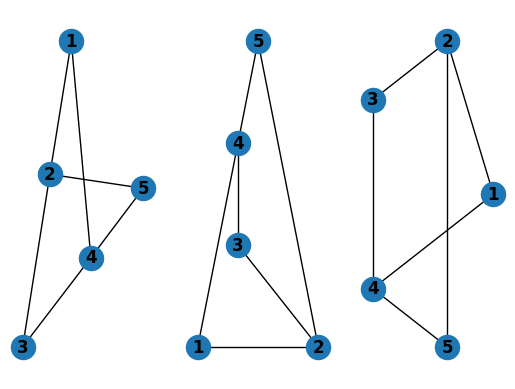

In [4]:
# Usando la librería networkx
# Creamos un grafo vacío 
Grafo = nx.Graph()
# Agregamos los vertices (Nodos) al grafo 
# add_node("n") agrega "n" como nodo del grafo
Grafo.add_node("1")      
Grafo.add_node("2")
Grafo.add_node("3")
Grafo.add_node("4")
Grafo.add_node("5")
# Agregamos las aristas al grafo
# add_edge("e") agrega "e" como borde de un nodo
# (1,2),(1,4),(2,3),(2,5),(3,4),(4,5)
Grafo.add_edge("1","2")  
Grafo.add_edge("1","4")
Grafo.add_edge("2","3")
Grafo.add_edge("2","5")
Grafo.add_edge("3","4")
Grafo.add_edge("4","5")
# Agregamos 3 gráficas del grafo
ax1 = plt.subplot(131)
nx.draw(Grafo, with_labels=True, font_weight='bold')
ax2 = plt.subplot(132)
nx.draw_planar(Grafo, with_labels=True, font_weight='bold')
ax3 = plt.subplot(133)
nx.draw_circular(Grafo, with_labels=True, font_weight='bold')

# 2. Algoritmo de Dijkstra
---
* Los grafos son usados para modelar conexiones entre objetos, personas o entidades.
* El algoritmo de Dijkstra usa grafos para encontrar el camino más optimo.

# 3. Código
---
* Esta implementación del Algoritmo de Dijkstra en Python utiliza min heap.
* En el código se representa un **grafo** por un diccionario diccionario.
* Las claves del diccionario (grafo) son sus nodos.
* Los valores de cada clave son otro diccionario que contiene los nodos conectados.
* El nodo clave y el valor asociado es la distancia.
* Para calcular el camino más corto de otro grafo simplemente modifique el diccionario.

In [5]:
def Dijkstra(Grafo, salida):
    dist, prev = {}, {}
    result = []

    for vertice in Grafo:
        dist[vertice] = float("inf")
        prev[vertice] = None
    dist[salida] = 0

    Q = [vertice for vertice in Grafo]

    while Q:
        u = min(Q, key=dist.get)
        Q.remove(u)
        result.append(u)

        for vecino in Grafo[u]:
            if vecino in Q and dist[vecino] > dist[u] + Grafo[u][vecino]:
                dist[vecino] = dist[u] + Grafo[u][vecino]
                prev[vecino] = u

    return result, dist, prev

### <code>Ejemplo:</code> Aplicación del algoritmo Dijkstra
---
Calcular la distancia minima desde el nodo a en el siguiente Grafo dirigido.

![](../img/graph_dijkstra.svg)

In [6]:
grafo = {
    'a': {'b': 4, 'c': 3},
    'b': {'d': 5},
    'c': {'b': 2, 'd': 3, 'e': 6},
    'd': {'f': 5, 'e': 1},
    'e': {'g': 5},
    'g': {'z': 4},
    'f': {'g': 2, 'z': 7},
    'z': {}
}
#El resultado del algoritmo de Dijkstra para el grafo dado en el código es:
s, distancia, previos = Dijkstra(grafo, 'a')
print(f"{s=}")
print(f"{distancia=}")
print(f"{previos=}")

s=['a', 'c', 'b', 'd', 'e', 'f', 'g', 'z']
distancia={'a': 0, 'b': 4, 'c': 3, 'd': 6, 'e': 7, 'g': 12, 'f': 11, 'z': 16}
previos={'a': None, 'b': 'a', 'c': 'a', 'd': 'c', 'e': 'd', 'g': 'e', 'f': 'd', 'z': 'g'}


In [ ]:
# Una diccionario en Python puede almacenar las etiquetas del grafo
distancia={'a': 0, 'b': 4, 'c': 3, 'd': 6, 'e': 7, 'g': 12, 'f': 11, 'z': 16}
# Una diccionario en Python puede almacenar las etiquetas del grafo
previos={'a': None, 'b': 'a', 'c': 'a', 'd': 'c', 'e': 'd', 'g': 'e', 'f': 'd', 'z': 'g'}

---
## Mas Recursos
- [Grafo](https://es.wikipedia.org/wiki/Grafo) (Wikipedia)
- [Teoría de grafos](https://es.wikipedia.org/wiki/Teor%C3%ADa_de_grafos) (Wikipedia)
- [Algoritmo de Dijkstra](https://es.wikipedia.org/wiki/Algoritmo_de_Dijkstra) - [Ejemplo](https://es.wikipedia.org/wiki/Anexo:Ejemplo_de_Algoritmo_de_Dijkstra) - [Video](https://www.youtube.com/watch?v=eGJRnwrTC5g) (Wikipedia, YouTube)
- [Operaciones con grafos](https://graphonline.ru/es/) (Graphonline)